<a href="https://colab.research.google.com/github/robervz22/Proyecto-Final-Series-de-Tiempo-2023/blob/main/Codigo_Proyecto_Final_Equipo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción con ARIMA: Intervenciones y cambios estructurales

Noteboook con algunos ejemplos y análisis que surjan del proyecto

In [1]:
rm(list=ls())

In [ ]:
install.packages("TSA")
install.packages("ggpp")
install.packages('latex2exp')
install.packages("xtable")
install.packages("forecast")
install.packages("expsmooth")

In [ ]:
library(data.table)
library(TSA)
library(ggplot2)
library(ggpp)
library(latex2exp)
library(tidyr)
library(xtable)
library(forecast)

Usaremos la librería `TSA` de `R` para estudiar algunos ejemplos con datos de modelos ARIMA, con componentes de estacionalidad y tendencia.

In [4]:
Month=c("J","F","M","A","M","J","J","A","S","O","N","D")
data(co2)
data(oil.price)

In [5]:
df_oil_price <- try_data_frame(oil.price)

In [6]:
dt_oil_price <- data.table(fecha=as.Date(df_oil_price$time),precio=df_oil_price$oil.price)

In [7]:
mysize <- 12
mytheme <- theme_bw() + # bw theme
  theme(
    axis.title = element_text(size=mysize),
    axis.text = element_text(size=mysize),
    legend.title = element_text(size=mysize),
    legend.text = element_text(size=mysize),
    plot.title=element_text(hjust=0.5,size=16)
    ) # cambiamos algunos valores

In [8]:
options(repr.plot.width = 10, repr.plot.height =6) # tamanio de los graficos

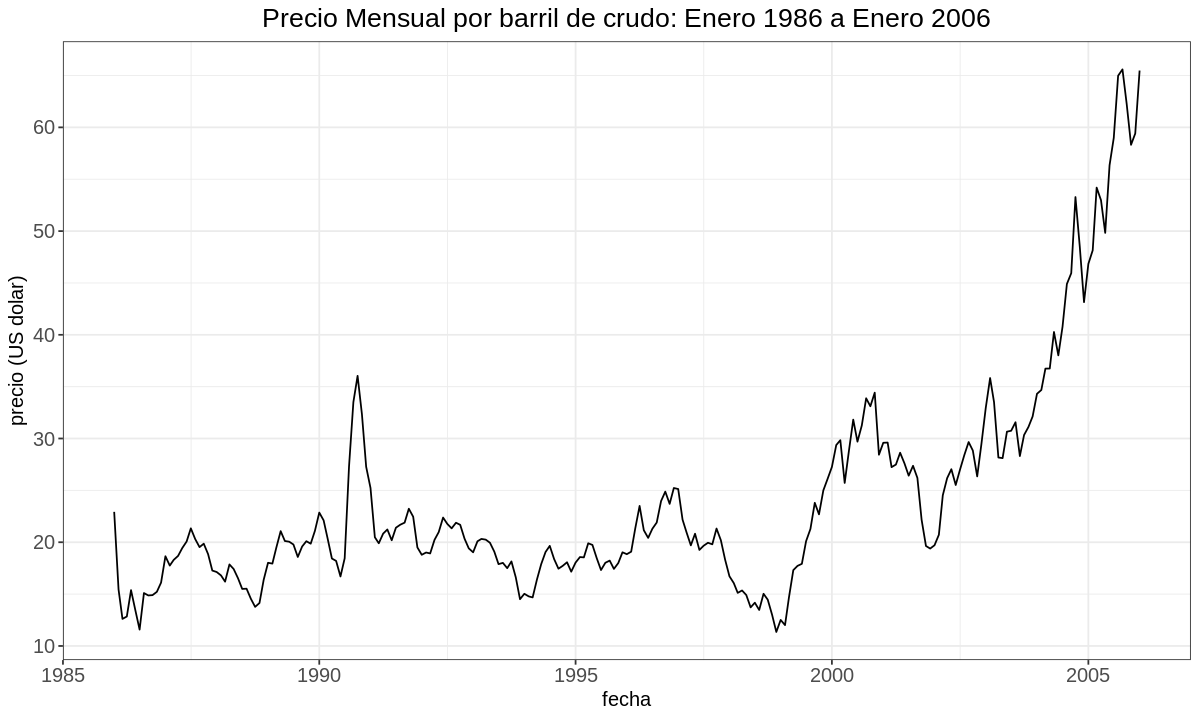

In [9]:
ggplot(dt_oil_price,aes(x=fecha,y=precio))+geom_line()+scale_x_date(date_labels = "%Y")+
ggtitle("Precio Mensual por barril de crudo: Enero 1986 a Enero 2006")+ylab("precio (US dolar)")+mytheme

In [10]:
df_co2 <- try_data_frame(co2)
head(df_co2)

,time,co2
,<dttm>,<dbl>
1,1994-01-01,363.05
2,1994-02-01,364.18
3,1994-03-01,364.87
4,1994-04-01,364.47
5,1994-05-01,364.32
6,1994-06-01,362.13


In [11]:
Month=c("J","F","M","A","M","J","J","A","S","O","N","D")
dt_co2 <- data.table(fecha=as.Date(df_co2$time),co2=df_co2$co2)

In [12]:
dt_co2[,mes:=as.numeric(strftime(fecha, "%m"))]
dt_co2[,mes:=Month[mes]]

In [13]:
head(dt_co2)

fecha,co2,mes
<date>,<dbl>,<chr>
1994-01-01,363.05,J
1994-02-01,364.18,F
1994-03-01,364.87,M
1994-04-01,364.47,A
1994-05-01,364.32,M
1994-06-01,362.13,J


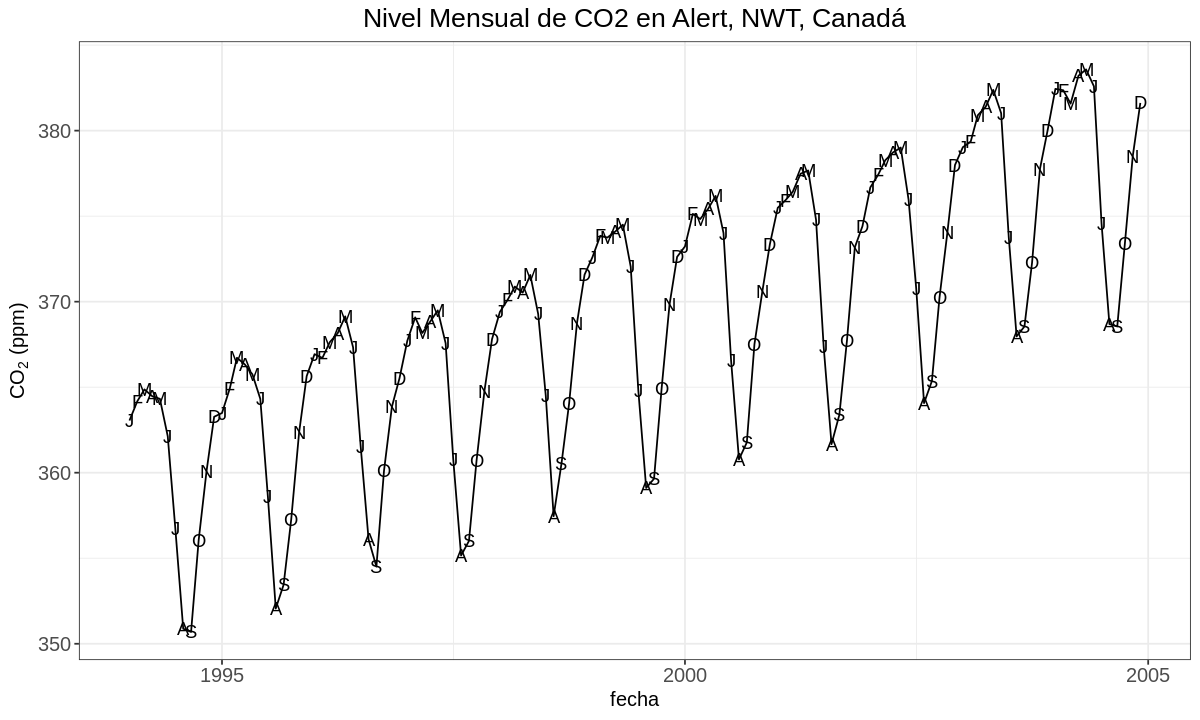

In [14]:
ggplot(dt_co2,aes(x=fecha,y=co2,label=mes))+geom_line()+scale_x_date(date_labels = "%Y")+
ggtitle("Nivel Mensual de CO2 en Alert, NWT, Canadá")+geom_text()+ylab(TeX(r'($CO_2$ (ppm))'))+mytheme

Con este ejemplo podemos analizar que pasa cuando usamos la librería `forecast`. En ese libraría perteneciente al CRAN de `R` se implementa, de manera automatizada, 30 modelos en la familia de *smoothing exponential*, eligiendo el de mejor desempeño.

Podemos comparar con los resultados obtenidos después de ajustar un modelo SARIMA. La forma de ajustar un modelo SARIMA entre el sin fin de posibilidades que brinda la elección del orden, estacionalidad e número de diferencias se desglosa a detalle en el reporte.

## Cita de los modelos

Consultamos algunos datos sobre la librería `forecast` en https://rdocumentation.org/packages/forecast/versions/8.21

Esta librería es ampliamente usada y actualizada de forma frecuente, lo que justifica el por qué deglosamos en detalle la teoría y metodologías en su implementación.

Cita de la paquetería `expsmooth`. La librería `forecast` contiene a la librería `expsmooth`

In [15]:
toBibtex(citation("expsmooth"))

@Manual{,
  title = {expsmooth: Data Sets from "Forecasting with Exponential Smoothing"},
  author = {Rob J Hyndman},
  year = {2015},
  note = {R package version 2.3},
  url = {https://CRAN.R-project.org/package=expsmooth},
}

In [16]:
toBibtex(citation("forecast"))

@Manual{,
  title = {{forecast}: Forecasting functions for time series and linear models},
  author = {Rob Hyndman and George Athanasopoulos and Christoph Bergmeir and Gabriel Caceres and Leanne Chhay and Mitchell O'Hara-Wild and Fotios Petropoulos and Slava Razbash and Earo Wang and Farah Yasmeen},
  year = {2023},
  note = {R package version 8.21.1},
  url = {https://pkg.robjhyndman.com/forecast/},
}

@Article{,
  title = {Automatic time series forecasting: the forecast package for {R}},
  author = {Rob J Hyndman and Yeasmin Khandakar},
  journal = {Journal of Statistical Software},
  volume = {26},
  number = {3},
  pages = {1--22},
  year = {2008},
  doi = {10.18637/jss.v027.i03},
}

## Pruebas Computacionales Modelos ETS

A continuación haremos la prueba del ajuste de los modelos ETS con las simulaciones descritas en el reporte.

In [17]:
set.seed(911)
## funcion para simular con innovaciones t-Student
sim_arima <- function(n, DF,d,theta) {
  arima.sim(n = n,
            model=list(order=d,ma=theta),
            n.start = 1,
            rand.gen = function(n) rt(n, df = DF),
            start.innov = 0)[-1L]
}
n=100
sim1 <- sim_arima(n,DF=4,d=c(0,1,1),theta=1)

Ahora haremos el ajuste con la función `ETS`

In [18]:
ets_sim1 <- ets(sim1[1:90])

In [19]:
ets_sim1

ETS(A,N,N) 

Call:
 ets(y = sim1[1:90]) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = -0.203 

  sigma:  1.7632

     AIC     AICc      BIC 
511.0442 511.3232 518.5436 

A continuación visualizamos los primeros resultados. La idea será simular mas trayectorias de los procesos definidos anteriormente para probar numéricamente la probabilidad de cobertura real de los intervalos de predicción hasta horizonte 10.

In [20]:
fcast_sim1<-forecast(ets_sim1,10)

In [21]:
pred_lower_sim1<-as.data.table(fcast_sim1$lower)
colnames(pred_lower_sim1)<-c('L80','L95')
pred_upper_sim1<-as.data.table(fcast_sim1$upper)
colnames(pred_upper_sim1)<-c('U80','U95')

Después de calcular los intervalos procederemos a hacer la visualización con, primero, 100 simulaciones mas.

In [22]:
set.seed(911)
## funcion para simular con innovaciones t-Student
sim_arima_path <- function(n,start,DF,d,theta) {
  arima.sim(n = n,
            model=list(order=d,ma=theta),
            n.start = 1,
            rand.gen = function(n) rt(n, df = DF),
            start.innov = start)[-1L]
}

In [23]:
m=10
set_sim1=c()
for(i in 1:100){
    V=sim_arima_path(m,sim1[90],DF=4,d=c(0,1,1),theta=1)
    set_sim1=cbind(set_sim1,as.array(V))
}

Ahora, comparamos las simulaciones con los intervalos. Construimos las tablas correspondientes

In [24]:
dt_sim1 <-as.data.table(set_sim1)
dt_sim1[,x:=c(1:10)]

In [25]:
pred_lower_sim1[,x:=c(1:10)]
pred_upper_sim1[,x:=c(1:10)]

In [26]:
pred_sim1<-merge(pred_lower_sim1,pred_upper_sim1,by="x")

In [27]:
dt_1_melt<-melt(dt_sim1,id.vars = "x", measure.vars = colnames(dt_sim1)[1:100],
                variable.name="sim",value.name="value")

Finalmente, realizamos la validación gráfica de la probabilidad de cobertura

In [28]:
interval1<-ggplot(data=pred_sim1,aes(x=x))+geom_ribbon(aes(ymin=L80,ymax=U80),alpha=0.3,fill='blue')+
geom_ribbon(aes(ymin=L95,ymax=U95),alpha=0.4,fill='blue')+mytheme

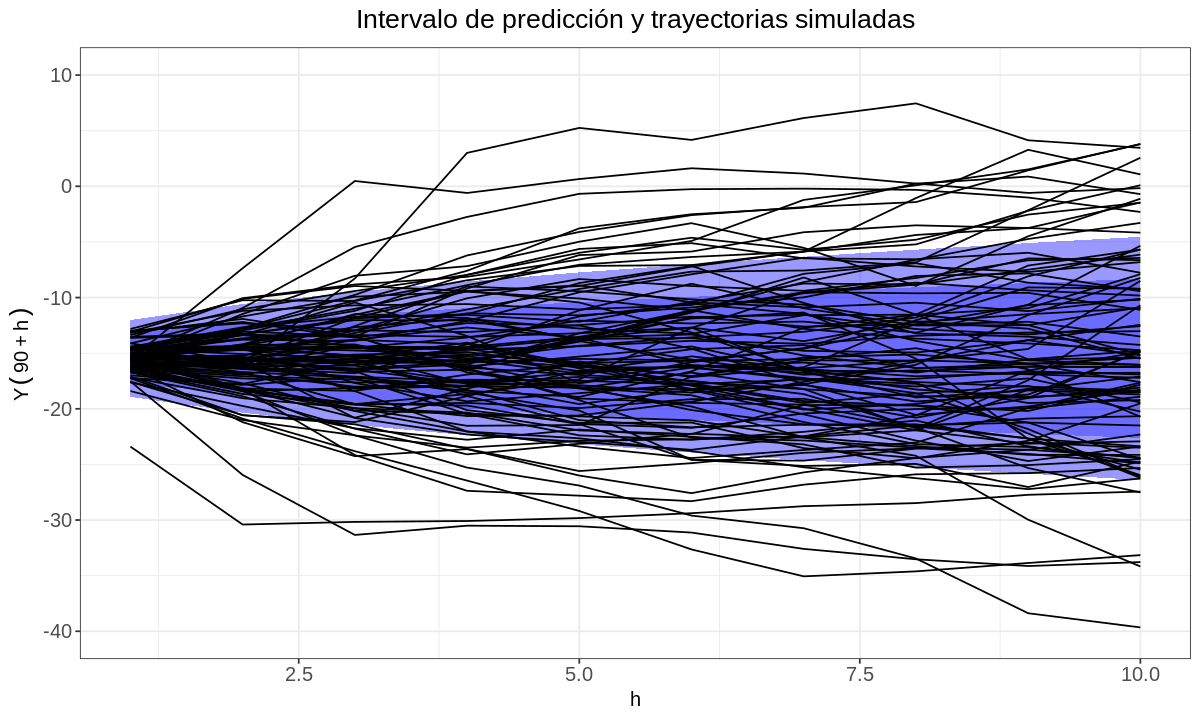

In [29]:
interval1+geom_line(data=dt_1_melt,aes(x=x,y=value,group=sim))+
  coord_cartesian(ylim=c(-40,10))+ylab(TeX(r'($Y(90+h)$)'))+xlab(TeX(r'(h)'))+
  ggtitle(TeX(r'(Intervalo de predicción y trayectorias simuladas)'))+mytheme

## Ejemplos ARIMA Automático

Ejemplificaremos el uso de la librería `forecast` para las series correspondientes a los datos de precios de barriles de crudo y emiciones de CO2.

### Precio del Crudo a lo largo del tiempo (Cushing,OK)

Para la serie de precios del crudo se realiza la estimación con la serie menos los últimos 10 meses, se hace la predicción para estos últimos 10 meses posteriores. Deberíamos tomar logaritmo a la serie antes de comenzar. Mostramos ambas posibilidades en el reporte.

In [30]:
h_oil=10
n_oil=dt_oil_price[,.N]
fitarima_oil <- auto.arima(dt_oil_price[,precio][1:(n_oil-h_oil)])
fcast_oil<-forecast(fitarima_oil,h_oil)

In [31]:
fitarima_oil

Series: dt_oil_price[, precio][1:(n_oil - h_oil)] 
ARIMA(2,1,1) with drift 

Coefficients:
         ar1      ar2      ma1   drift
      0.8253  -0.2521  -0.6134  0.1377
s.e.  0.2025   0.0690   0.2010  0.1177

sigma^2 = 3.924:  log likelihood = -481.6
AIC=973.21   AICc=973.47   BIC=990.4

Visualizamos la estimación de la trayectoria observada

In [32]:
dt_est_oil <- data.table(fecha=dt_oil_price[,fecha][1:(n_oil-h_oil)],
                        estimacion=as.numeric(fcast_oil$fitted),
                        observacion=dt_oil_price[,precio][1:(n_oil-h_oil)])

dt_est_oil_melt <- melt(dt_est_oil,id.vars = "fecha",
                        measure.vars=c("estimacion","observacion"),
                        variable.name="precio",value.name="value")

In [33]:
tail(dt_est_oil)

fecha,estimacion,observacion
<date>,<dbl>,<dbl>
2004-10-01,45.56964,53.28
2004-11-01,54.40518,48.47
2004-12-01,46.34890,43.15
2005-01-01,41.99280,46.84
2005-02-01,48.31233,48.15
2005-03-01,48.45920,54.19


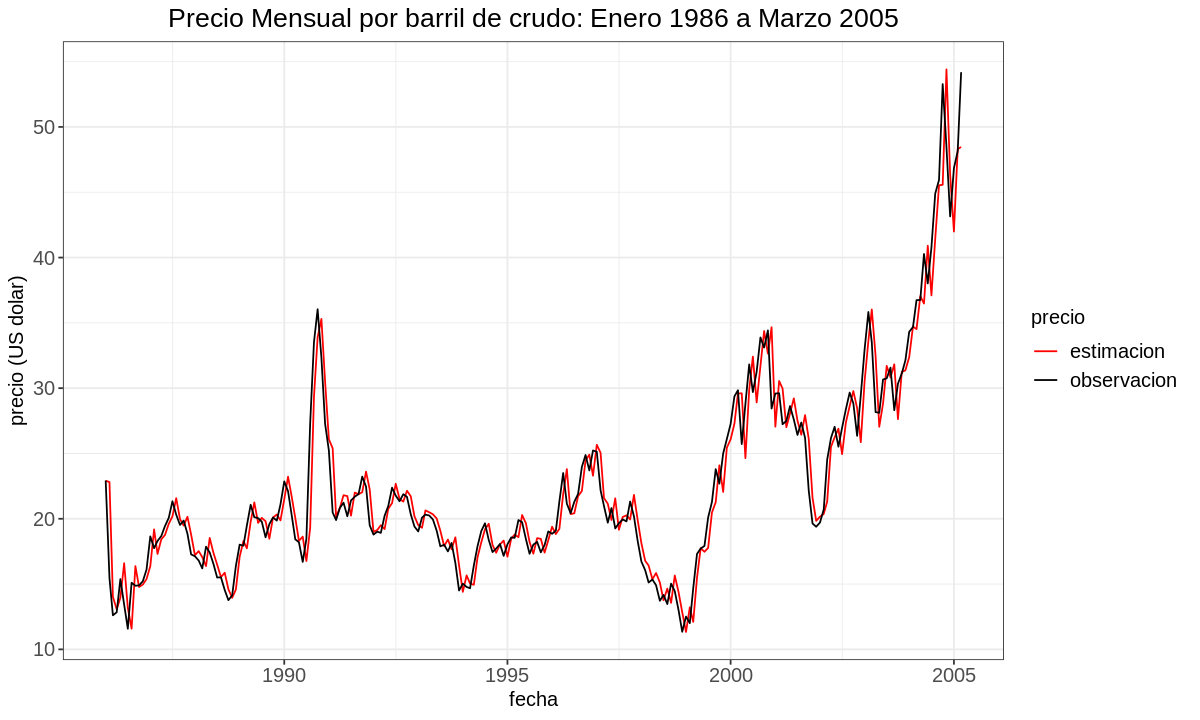

In [34]:
ggplot(dt_est_oil_melt,aes(x=fecha,y=value,color=precio))+geom_line()+
ggtitle("Precio Mensual por barril de crudo: Enero 1986 a Marzo 2005")+ylab("precio (US dolar)")+mytheme+
scale_color_manual(values = c("red", "black"))

Ahora, realizamos el intervalo de predicción junto la observación

In [35]:
dt_pred_oil<-data.table(fecha=dt_oil_price[,fecha][(n_oil-h_oil+1):n_oil],
                        L=as.numeric(fcast_oil$lower[,2]),
                        U=as.numeric(fcast_oil$upper[,2]),
                        prediccion=as.numeric(fcast_oil$mean),
                        observacion=dt_oil_price[,precio][(n_oil-h_oil+1):n_oil])

dt_pred_oil_melt<-melt(dt_pred_oil,id.vars = c("fecha","L","U"),
                       measure.vars=c("prediccion","observacion"),
                       variable.name="precio",
                       value.name="value")

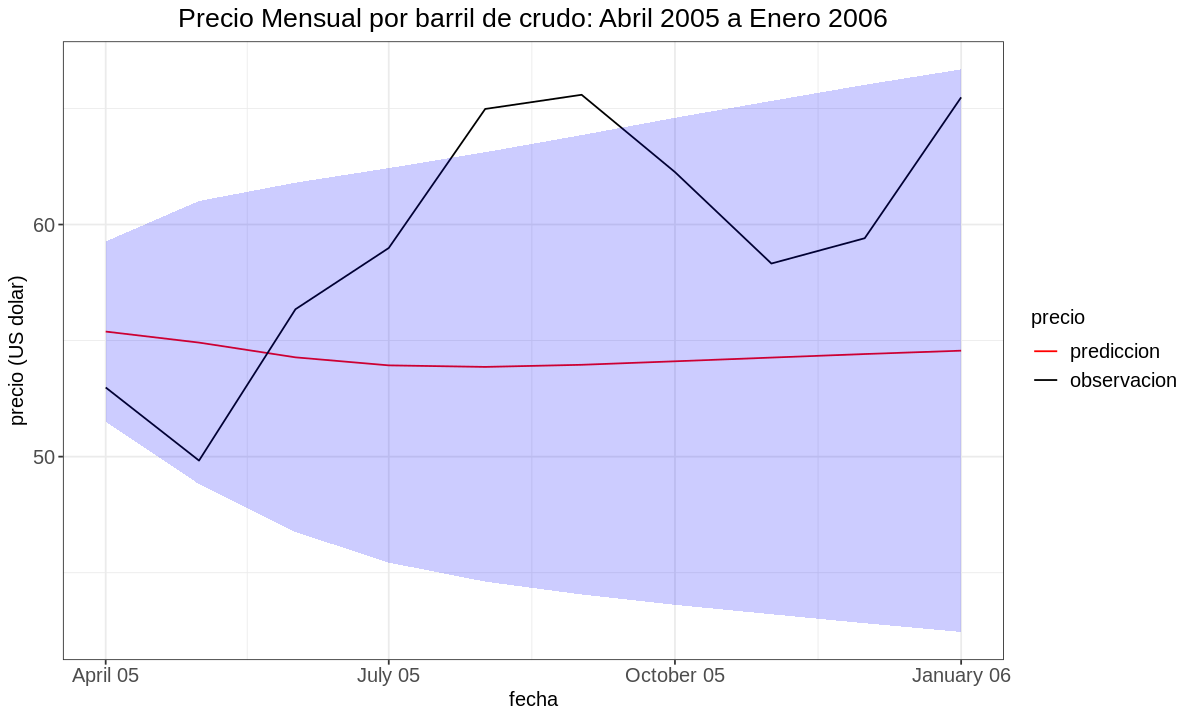

In [36]:
ggplot(dt_pred_oil_melt,aes(x=fecha,y=value))+geom_line(aes(color=precio))+
geom_ribbon(aes(ymin=L,ymax=U),fill="blue",alpha=0.2)+
ggtitle("Precio Mensual por barril de crudo: Abril 2005 a Enero 2006")+ylab("precio (US dolar)")+mytheme+
scale_color_manual(values = c("red", "black"))+scale_x_date(date_labels = "%B %y")

### Niveles de CO2 (Alert, NWT, Canadá)

Haremos el ejercicio análogo

In [37]:
dt_co2[,mes:=NULL]

In [38]:
h_co2=12
n_co2=dt_co2[,.N]
fitarima_co2 <- auto.arima(co2[1:(n_co2-h_co2)],allowmean=T,allowdrift=T,D=1)
fcast_co2 <- forecast(fitarima_co2,h_co2)

In [39]:
fitarima_co2

Series: co2[1:(n_co2 - h_co2)] 
ARIMA(2,1,0) 

Coefficients:
         ar1      ar2
      0.9443  -0.5655
s.e.  0.0750   0.0752

sigma^2 = 5.118:  log likelihood = -265.59
AIC=537.18   AICc=537.39   BIC=545.52

Continuamos con la estimación de la trayectoria observada

In [40]:
dt_est_co2 <- data.table(fecha=dt_co2[,fecha][1:(n_co2-h_co2)],
                        estimacion=as.numeric(fcast_co2$fitted),
                        observacion=dt_co2[,co2][1:(n_co2-h_co2)])

dt_est_co2_melt <- melt(dt_est_co2,id.vars = "fecha",
                        measure.vars=c("estimacion","observacion"),
                        variable.name="co2",value.name="value")

In [41]:
head(dt_est_co2_melt)

fecha,co2,value
<date>,<fct>,<dbl>
1994-01-01,estimacion,362.6870
1994-02-01,estimacion,363.4370
1994-03-01,estimacion,364.8629
1994-04-01,estimacion,364.8826
1994-05-01,estimacion,363.7021
1994-06-01,estimacion,364.4045


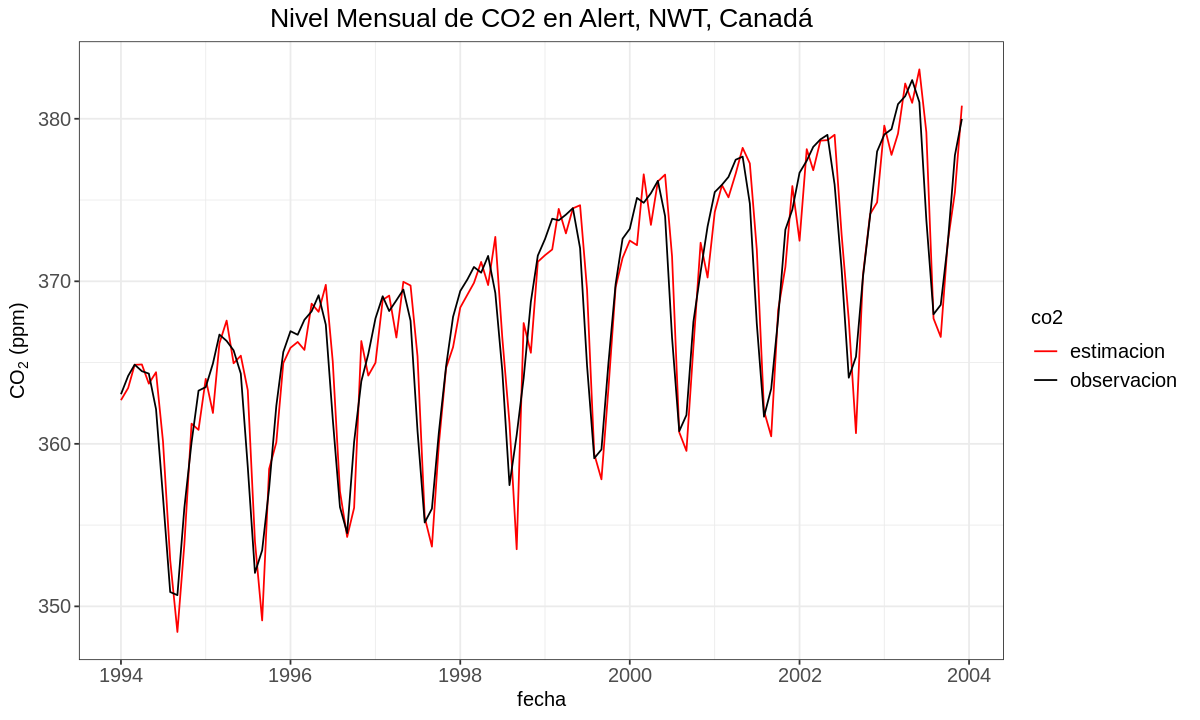

In [42]:
ggplot(dt_est_co2_melt,aes(x=fecha,y=value,color=co2))+geom_line()+
ggtitle("Nivel Mensual de CO2 en Alert, NWT, Canadá")+ylab(TeX(r"($CO_2$ (ppm))"))+mytheme+
scale_color_manual(values = c("red", "black"))

Finalmente, realizamos la predicción

In [43]:
dt_pred_co2<-data.table(fecha=dt_co2[,fecha][(n_co2-h_co2+1):n_co2],
                        L=as.numeric(fcast_co2$lower[,2]),
                        U=as.numeric(fcast_co2$upper[,2]),
                        prediccion=as.numeric(fcast_co2$mean),
                        observacion=dt_co2[,co2][(n_co2-h_co2+1):n_co2])

dt_pred_co2_melt<-melt(dt_pred_co2,id.vars = c("fecha","L","U"),
                       measure.vars=c("prediccion","observacion"),
                       variable.name="co2",
                       value.name="value")

Realizamos la visualización

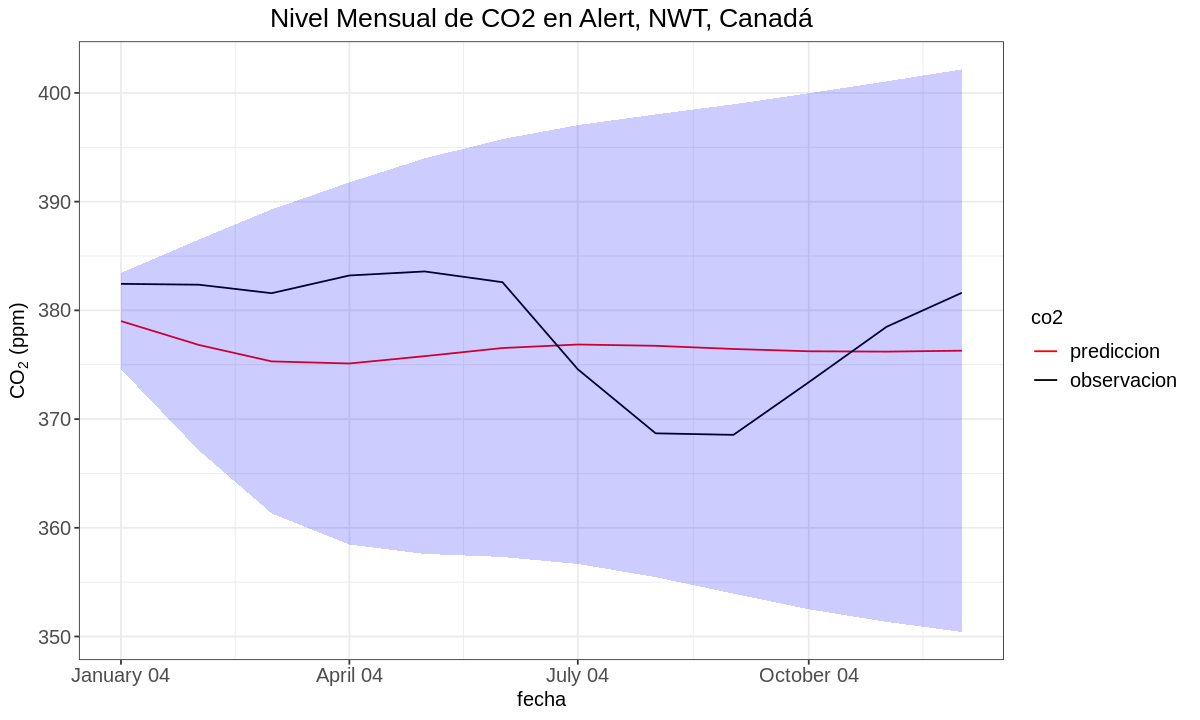

In [44]:
ggplot(dt_pred_co2_melt,aes(x=fecha,y=value))+geom_line(aes(color=co2))+
geom_ribbon(aes(ymin=L,ymax=U),fill="blue",alpha=0.2)+
ggtitle("Nivel Mensual de CO2 en Alert, NWT, Canadá")+ylab(TeX(r"($CO_2$ (ppm))"))+mytheme+
scale_color_manual(values = c("red", "black"))+scale_x_date(date_labels = "%B %y")